In [1]:
from sklearn.linear_model import ARDRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from Importer import *
import Processor
importlib.reload(Processor)

<module 'Processor' from 'C:\\Users\\venablecrofta\\OneDrive - Virginia Tech\\Documents\\GitHub\\ME_5984-Final-Project\\Processor.py'>

In [125]:
path =  r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Documents\GitHub\ME_5984-Final-Project\train_FD001.csv"
test_path =  r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Documents\GitHub\ME_5984-Final-Project\test_FD001.csv"

index_names  = ['id', 'cycles']
setting_names  = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f"s_{x}" for x in range(1, 22)]
col_names = index_names + setting_names + sensor_names

def apply_names (path, column_names):
    df  = pd.read_csv(path, header=None, delimiter =r"\s+", names = column_names)
#     df = df.set_axis(column_names, axis=1)
    return df
df_train = apply_names(path, col_names)
df_test= apply_names(test_path, col_names)


df_train_RUL = df_train.groupby(['id']).agg({'cycles':'max'})
df_train_RUL.rename(columns={'cycles':'life'},inplace=True)
df_train_RUL.head()
df_train=df_train.merge(df_train_RUL,how='left',on=['id'])

df_train['RUL']=df_train['life']-df_train['cycles']
df_train.drop(['life'],axis=1,inplace=True)
df_train.head()

,id,cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [126]:
df_test_RUL = pd.read_csv('RUL_FD001.csv',header=None, delimiter =r"\s+")
print(df_test_RUL)

      0
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]


In [127]:
print(df_train.columns)

Index(['id', 'cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2',
       's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12',
       's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21',
       'RUL'],
      dtype='object')


In [128]:
columns_to_drop = ['setting_1', 'setting_2', 'setting_3', 's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
df_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [129]:
scaler = MinMaxScaler()
df_test_cycle = df_test.groupby(['id']).agg({'cycles':'max'})
df_test_cycle.rename(columns={'cycles':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['id'])
df_test_max = df_test_max[(df_test_max['cycles']==df_test_max['life'])]
# df_test_max['RUL'] = df_test_max['life']-df_test_max['cycles']
df_test_max.drop(['life'],axis=1,inplace=True)

In [130]:
df_test_max.head()

,id,cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
30,1,31,642.58,1581.22,1398.91,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
79,2,49,642.55,1586.59,1410.83,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
205,3,126,642.88,1589.75,1418.89,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
311,4,106,642.78,1594.53,1406.88,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
409,5,98,642.27,1589.94,1419.36,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117


In [131]:
feature_names = [col for col in df_train.columns if col.startswith('s') or col.startswith('sensor')]

X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
print(np.shape(X_train))
print(np.shape(X_test))

(20631, 14)
(100, 14)


In [148]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=9).fit(X_train,y_train)
y_predictions = model.predict(X_test) # These are the predictions from the test data.

In [153]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())
model_performance.loc['kNN'] = [model.score(X_test,y_test), 
                                   mean_squared_error(y_test,y_predictions,squared=False)]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

R-squared error: 41.13%
Root Mean Squared Error: 31.88


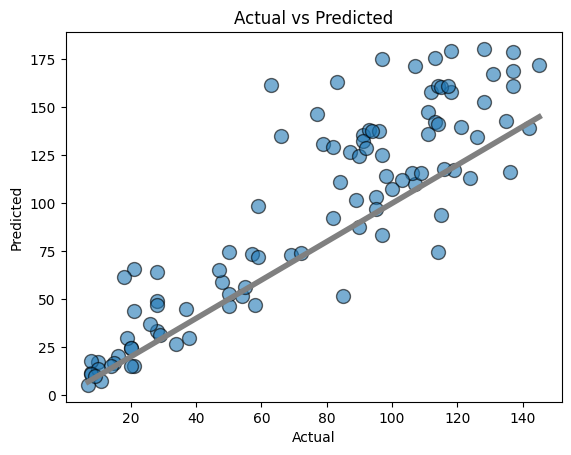

In [134]:
fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)